In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# ROUND 4

In [5]:
data = pd.read_csv('my_data/cleaned.csv')
data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,response_rate,response_num,bins_income,bins_claims
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,Offer3,Agent,292.800000,Four-Door Car,Medsize,B,0.865628,0,<50000.0,<480.0
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,Offer4,Call Center,744.924331,Four-Door Car,Medsize,B,0.865628,0,<10000.0,<960.0
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,Offer3,Call Center,480.000000,SUV,Medsize,A,0.865628,0,<30000.0,<480.0
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,0.134372,1,<50000.0,<960.0
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,Offer1,Branch,707.925645,Four-Door Car,Medsize,B,0.865628,0,<30000.0,<960.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,Offer3,Web,1214.400000,Luxury Car,Medsize,A,0.865628,0,<10000.0,<1450.0
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,0.865628,0,<70000.0,<480.0
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,Offer1,Web,381.306996,Luxury SUV,Medsize,B,0.865628,0,<40000.0,<480.0
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,Offer1,Branch,618.288849,SUV,Medsize,A,0.865628,0,<70000.0,<960.0


In [6]:
data.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim          float64
months_since_policy_inception      int64
number_of_open_complaints        float64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
vehicle_type    

In [7]:
#data['effective to date'] = list(map(pd.to_datetime, data['effective to date']))
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'])
data.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                 float64
months_since_policy_inception             int64
number_of_open_complaints               float64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [8]:
#nums = data[[i for i in data.columns if isinstance(i, np.number)]]
nums = data.select_dtypes(np.number)
nums = nums.drop(['response_num', 'response_rate'], axis=1)
nums

cats = data.select_dtypes(object)
cats = cats.drop(['bins_income', 'bins_claims'], axis=1)
cats

dates = data.select_dtypes(exclude=(object, np.number))
dates.dtypes

effective_to_date    datetime64[ns]
dtype: object

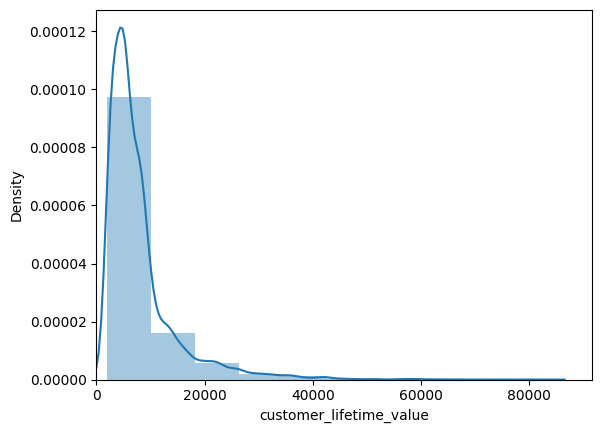

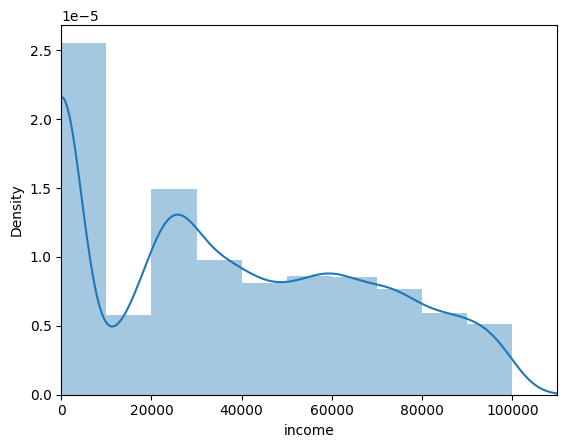

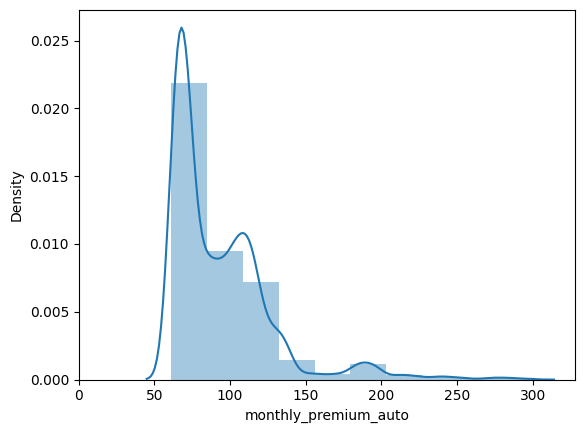

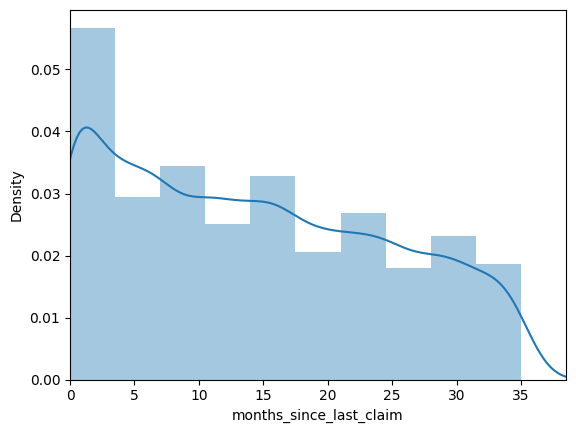

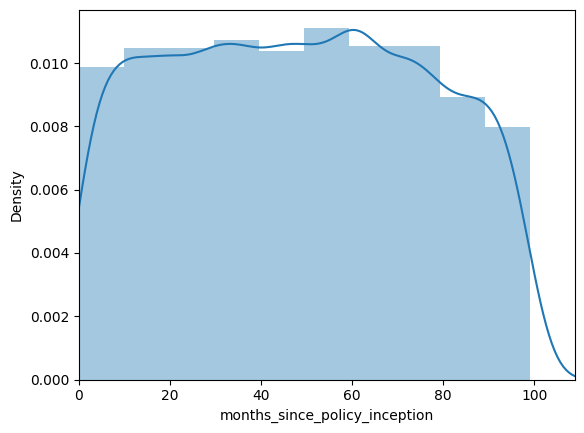

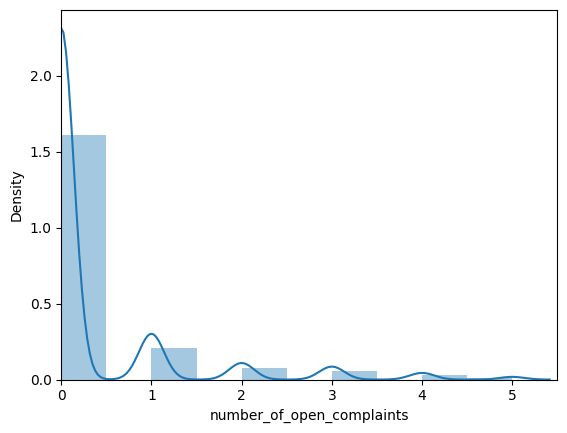

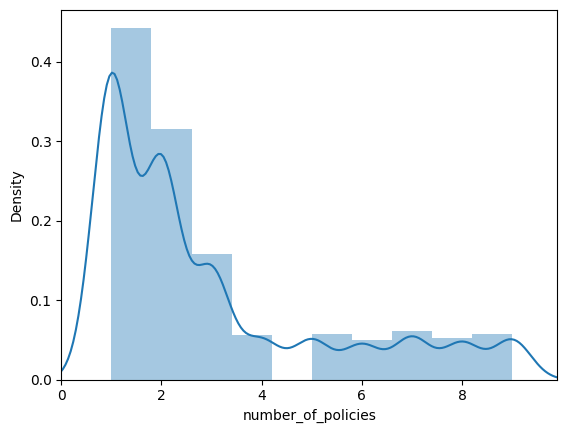

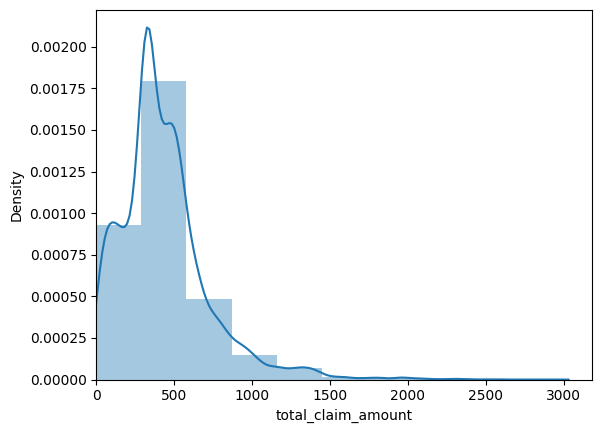

In [9]:
#distplots

for col in nums.columns:
    sns.distplot(nums[col], bins=10)
    plt.xlim([0,nums[col].max() * 1.1])
    plt.show()

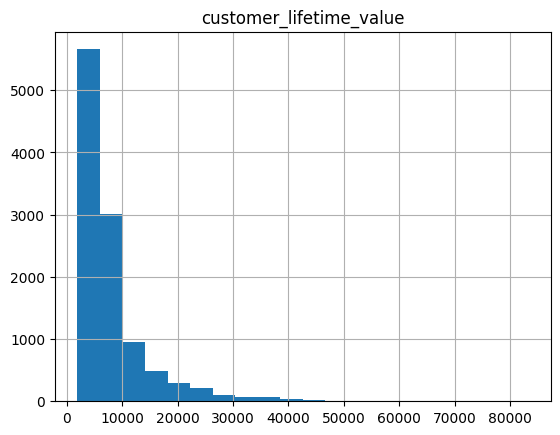

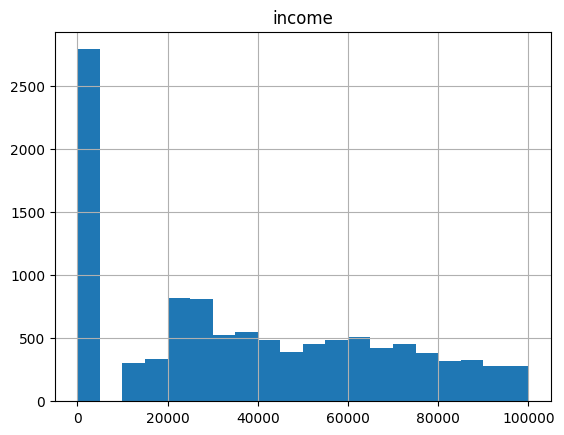

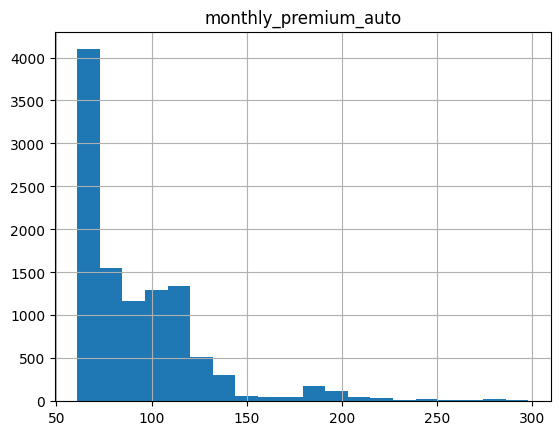

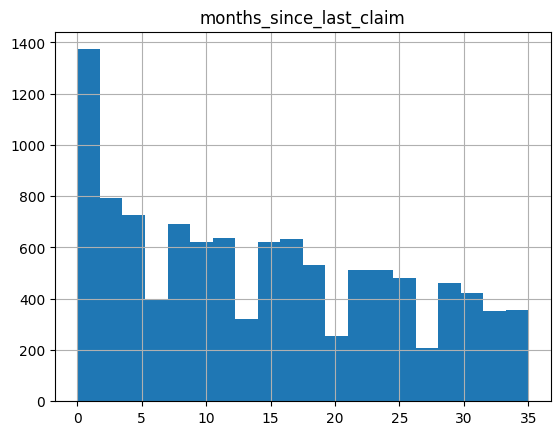

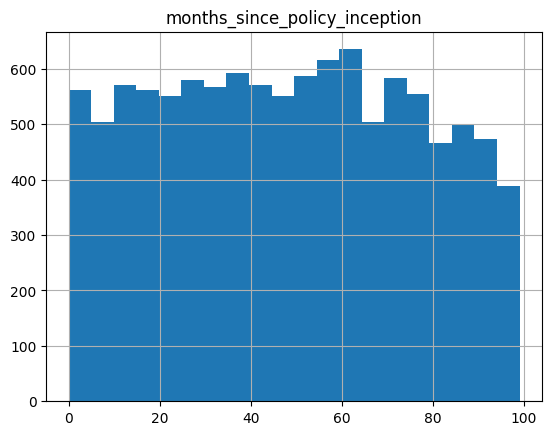

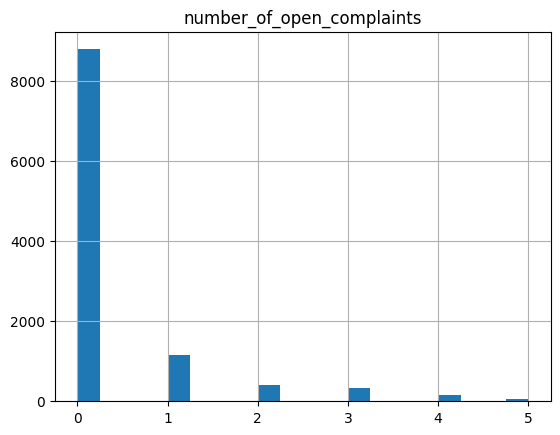

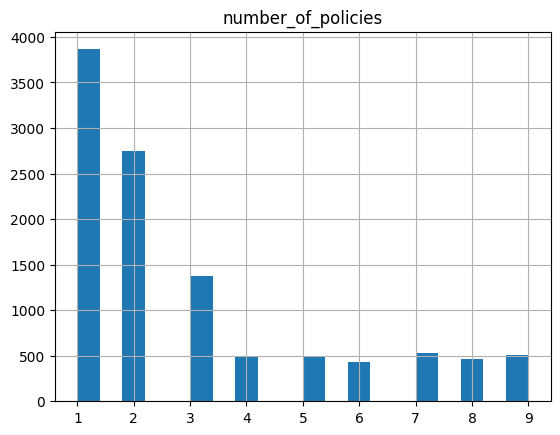

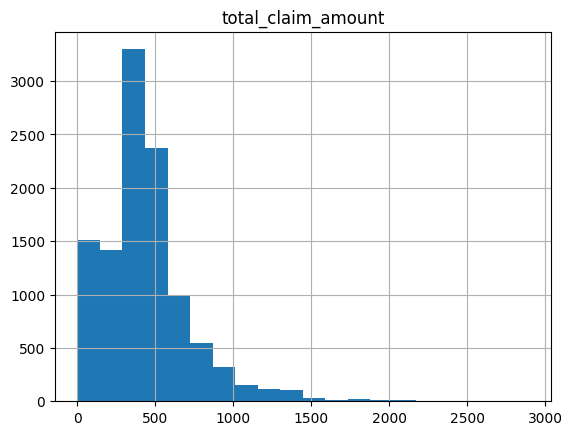

In [10]:
#histograms

for col in nums.columns:
    nums[col].hist(bins=20)
    plt.title(col)
    plt.show()

In [11]:
# normal distribution ??? maybe MONTHS SINCE POLICY INCEPTION, INCOME (, TOTAL CLAIM AMOUNT)
nums.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

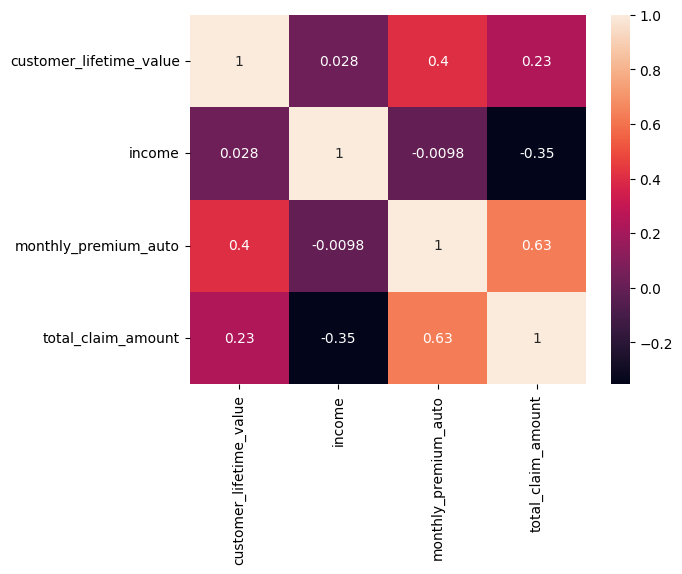

In [12]:
nums_corr = nums.corr()
nums_clean = nums.drop(['months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies'], axis=1)
nums_clean_corr = nums_clean.corr()
sns.heatmap(nums_clean_corr, annot=True)
plt.show()
# no multicollinearity

# decided to keep negative value, too because it also has influence on the claim amount

# ROUND 5

In [13]:
y = nums['total_claim_amount']
X = nums.drop(['total_claim_amount'], axis=1)
X.shape

(10910, 7)

In [14]:
from sklearn.preprocessing import MinMaxScaler 

tm = MinMaxScaler().fit(X)
X_norm_m = tm.transform(X)
X_norm_m = pd.DataFrame(X_norm_m, columns=X.columns)
display(X_norm_m.describe().T)
display(X_norm_m)

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,10910.0,0.075162,0.084555,0.0,0.025992,0.047566,0.087130,1.0
income,10910.0,0.375434,0.303650,0.0,0.000000,0.338199,0.622626,1.0
monthly_premium_auto,10910.0,0.135848,0.145327,0.0,0.029536,0.092827,0.202532,1.0
months_since_last_claim,10910.0,0.407718,0.297282,0.0,0.142857,0.371429,0.657143,1.0
months_since_policy_inception,10910.0,0.485777,0.282229,0.0,0.242424,0.484848,0.717172,1.0
number_of_open_complaints,10910.0,0.072392,0.178027,0.0,0.000000,0.000000,0.000000,1.0
number_of_policies,10910.0,0.247399,0.299920,0.0,0.000000,0.125000,0.375000,1.0


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.0,1.000
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.0,0.000
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.0,0.125
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.0,0.125
4,0.087527,0.236795,0.236287,0.000000,0.313131,0.0,0.750
...,...,...,...,...,...,...,...
10905,0.167823,0.000000,0.810127,0.000000,0.404040,0.0,0.750
10906,0.041281,0.611576,0.016878,0.200000,0.686869,0.0,0.625
10907,0.270122,0.398446,0.590717,0.314286,0.636364,0.0,0.125
10908,0.123717,0.642072,0.409283,0.000000,0.272727,0.8,0.625


In [15]:
from sklearn.preprocessing import StandardScaler

ts = StandardScaler().fit(X)
X_norm_s = ts.transform(X)
X_norm_s = pd.DataFrame(X_norm_s, columns=X.columns)
display(X_norm_s.describe().T)
display(X_norm_s)



,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,10910.0,-1.426296e-16,1.000046,-0.888953,-0.581543,-0.326386,0.141550,10.938228
income,10910.0,4.949702e-17,1.000046,-1.236462,-1.236462,-0.122630,0.814106,2.056958
monthly_premium_auto,10910.0,1.048555e-16,1.000046,-0.934819,-0.731573,-0.296045,0.458871,5.946524
months_since_last_claim,10910.0,-6.187127e-17,1.000046,-1.371549,-0.890982,-0.122075,0.839058,1.992418
months_since_policy_inception,10910.0,1.107170e-16,1.000046,-1.721295,-0.862293,-0.003290,0.819920,1.822089
number_of_open_complaints,10910.0,5.275340e-17,1.000046,-0.406656,-0.406656,-0.406656,-0.406656,5.210736
number_of_policies,10910.0,5.731234e-17,1.000046,-0.824922,-0.824922,-0.408125,0.425469,2.509455


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,-0.466105,0.345635,-0.934819,-0.698755,0.139877,-0.406656,2.509455
1,-0.840946,-1.236462,-0.847713,-1.083209,-0.790709,-0.406656,-0.824922
2,1.006523,-0.507194,0.197554,1.896304,-0.611750,-0.406656,-0.408125
3,2.079112,0.380189,0.110448,-0.410415,-1.613919,-0.406656,-0.408125
4,0.146240,-0.456597,0.691152,-1.371549,-0.611750,-0.406656,1.675860
...,...,...,...,...,...,...,...
10905,1.095916,-1.236462,4.639940,-1.371549,-0.289625,-0.406656,1.675860
10906,-0.400710,0.777715,-0.818678,-0.698755,0.712545,-0.406656,1.259063
10907,2.305825,0.075787,3.130109,-0.314302,0.533586,-0.406656,-0.408125
10908,0.574273,0.878150,1.881595,-1.371549,-0.754917,4.087257,1.259063


In [16]:
nums.to_csv('my_data/nums.csv', index=False)
cats.to_csv('my_data/cats.csv', index=False)
dates.to_csv('my_data/dates.csv', index=False)

y.to_csv('my_data/y.csv', index=False)
X_norm_s.to_csv('my_data/nums_m.csv', index=False)
X_norm_m.to_csv('my_data/nums_s.csv', index=False)